## Introduction to Basemap

The matplotlib library provides hooks for creating extensions called toolkits. To date, several have been created to compliment matplotlib, and over the course of the next few lessons, we'll be using one in particular called Basemap for mapping data.

The Basemap matplotlib toolkit is a library for plotting 2-dimensional data onto maps. As an extension to matplotlib, Basemap does not do any of the plotting itself, but instead it provides several map projections for transforming geographic coordinates into points on a 2-dimensional cartesian plane, or more succinctly, these projections transform longitude and latitude into x and y coordinates that can then be plotted using the matplotlib library. Basemap was created by scientists for scientists, and as such, it can be a bit cumbersome to work with at times for the layman, but it is extremely powerful and featureful, and is likely to be the only tool you'll ever need for mapping data with matplotlib.

In this lesson, we'll take our first steps with Basemap by drawing a simple map of the world. Along the way, we'll see how to do things like draw the meridians and parallels on a map, otherwise known as the longitude and latitude lines on a map. We'll see how to draw the coastlines and political borders of a map. And, how to style a map to make it aesthetically pleasing as well as informative. But, before we can do any of those things, our very first task at hand is choosing a map projection.

## Choosing a Projection

As we learned in the previous lesson, the act of transforming points on a 3-dimensional object to coordinates on a 2-dimensional surface is not something that can be done without some error. As a result, every map you've ever used is in some way incorrect, but even with inaccuracies, each has some advantage in particular use cases. The example we gave in the last section was that of the mercator projection which has advantages for nautical navigation at the expense of greatly distorting the size of some land masses. 

Picking the right map projection then is a question of trade-offs. You need to think about your data, and what message you are trying to convey, and choose the right projection for both. Since this is a course on matplotlib and not mapping, going into details of how to choose the right map projection is outside of the scope of this course, but if you're interested in learning more, I've included a link to an excellent article from [source.opennews.org][1] below.

*Some good articles on map projections, the problems associated with them, and choosing the right one.*
- [Choosing the Right Map Projection][2]
- [Why Google Maps gets Africa wrong][3]

[1]: https://source.opennews.org/
[2]: https://source.opennews.org/en-US/learning/choosing-right-map-projection/
[3]: http://www.theguardian.com/world/2014/apr/02/google-maps-gets-africa-wrong

In [1]:
# The current version of NumPy available from conda is issuing a warning 
# message that some behavior will change in the future when used with the 
# current version of matplotlib available from conda. This cell just keeps
# that warning from being displayed.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats

# Turn on retina display mode
set_matplotlib_formats('retina')

In [3]:
from mpl_toolkits import basemap
print basemap.supported_projections

 cea              Cylindrical Equal Area                  
 mbtfpq           McBryde-Thomas Flat-Polar Quartic       
 aeqd             Azimuthal Equidistant                   
 sinu             Sinusoidal                              
 poly             Polyconic                               
 omerc            Oblique Mercator                        
 gnom             Gnomonic                                
 moll             Mollweide                               
 lcc              Lambert Conformal                       
 tmerc            Transverse Mercator                     
 nplaea           North-Polar Lambert Azimuthal           
 gall             Gall Stereographic Cylindrical          
 npaeqd           North-Polar Azimuthal Equidistant       
 mill             Miller Cylindrical                      
 merc             Mercator                                
 stere            Stereographic                           
 eqdc             Equidistant Conic                     

### The Robinson Projection

There are three currently popular projection choices that we see being used regularly: Robinson, Winkel tripel, and Kavrayskiy 7 projections. In the R and ggplot example Kristoffer uses the Robinson projection, so we'll use that one here as well. Incidentally, the Robinson projection was previously used by National Geographic, as Kristoffer explains in his article, and was eventually replaced by the Winkel Tripel projection. Kristoffer goes on to give an example of how the latter looks at the end of his article, but unfortunately that projection is not currently available in the basemap library, so we'll just stick the Robinson projection for this example. 

Creating our projection is easy. Simply call the `Basemap` constructor and pass in the name of the projection that you want to use---in our case that will be 'robin'. Then we need to specify the latitude and longitude of the center of the map. Finally, we specify the resolution with which we wish to draw boundaries of the map (e.g., the coastlines). The options available are 'c' (crude), 'l' (low), 'i' (intermediate), 'h' (high), 'f' (full) or None. The higher the resolution the longer it takes to draw the map. The default value for this is 'c', which we will go ahead and specify in our example. If None is chosen for this parameter, no boundary data will be read in and any calls to methods such as `drawcoastlines` will raise an error.

In [4]:
m = Basemap(resolution='c',
            projection='robin',
            lat_0=0., lon_0=0.)  # Center around latitude, longitude (0,0)

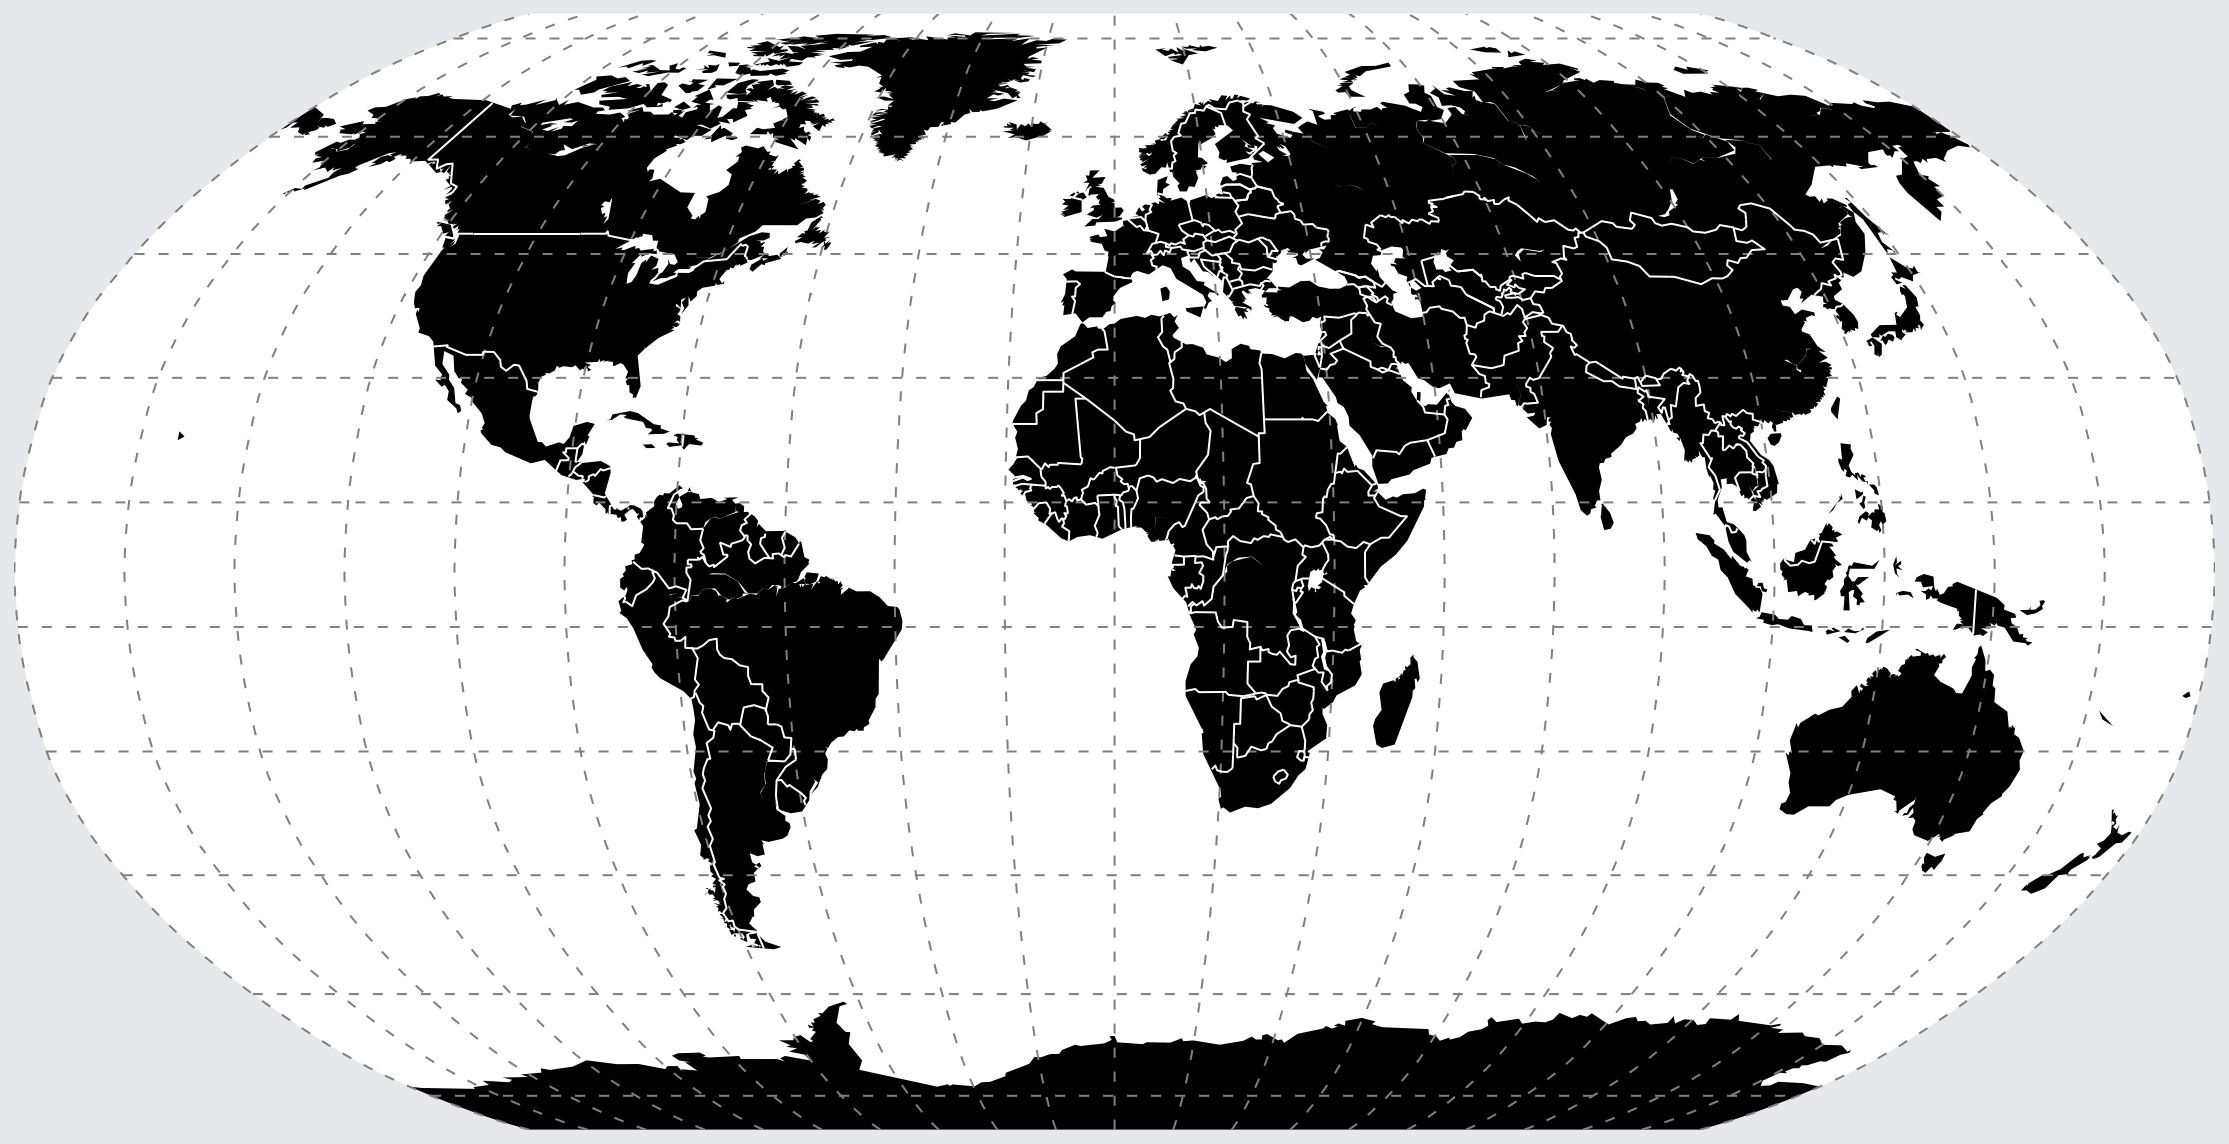

In [5]:
fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('#e6e8ec')
#ax = fig.add_axes([0.1,0.1,0.8,0.8])

# Draw the white map background
m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')

# Draw the latitudinal (parallels) and longitudinal (meridians) lines 
# (i.e., the graticules)
n_graticules = 18
parallels = np.arange(-80., 90., n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)

m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)

# Draw the continents and the countries

# Since we are drawing borders in white (and the background is white), 
# we don't really need this call since it can't be seen.
# m.drawcoastlines(linewidth=0)

m.fillcontinents('black', 
                 lake_color='white')

m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

plt.show()

This notebook shows how to work with maps in Python using matplotlib and basemap. It is based on two articles: ["Working With Maps in Python"][1] by Max Berggren which is itself based on the second article ["Working with shapefiles, projections and world maps in ggplot"][2] by Kristoffer Magnusson. The latter uses R and ggplot and the former is a translation of the latter into Python using matplotlib and the [basemap][3] library.

[1]: http://maxberggren.github.io/2015/08/04/basemap/
[2]: http://rpsychologist.com/working-with-shapefiles-projections-and-world-maps-in-ggplot
[3]: http://matplotlib.org/basemap/